In [1]:
#numpy
import numpy as np
from numpy import column_stack

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

import pickle 

# sklearn
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler

# time
import time

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Load Dataset

train_fash_data = pd.read_csv('fashion-mnist_train.csv')
test_fas_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Splitting Data Set

X_train, X_val, Y_train, Y_val =  train_test_split(train_fash_data.drop('label', axis=1), train_fash_data['label'], test_size=0.2, random_state = 42, stratify =train_fash_data['label'])
X_test = test_fas_data.drop('label', axis=1)
Y_test = test_fas_data['label']
X_train.shape

(48000, 784)

In [4]:
X_train = X_train.iloc[40000:]
X_test = X_test.iloc[5000:]
Y_train = Y_train.iloc[40000:]
Y_test = Y_test.iloc[5000:]
X_val = X_val.iloc[5000:]
Y_val = Y_val.iloc[5000:]

In [5]:
# Scale data input features

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Onehot encode labels
lab_scaler = LabelEncoder().fit(np.array(Y_train).reshape(-1,1))
Y_train = lab_scaler.transform(np.array(Y_train).reshape(-1,1))
Y_test = lab_scaler.transform(np.array(Y_test).reshape(-1,1))
Y_val = lab_scaler.transform(np.array(Y_val).reshape(-1,1))

In [6]:
def supp_vec_mac_lin():
    
    
    train_input_acc ={}
    test_input_acc = {}
    val_input_acc = {}
    train_acc_n_vec = {}
    C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    
    for c in C:
        print('Model Evaluation for Value of : ', c)
        model = SVC(C=c, kernel='linear', verbose=True)
        model.fit(X_train, Y_train)
        train_input_acc[c] = model.score(X_train, Y_train)
        train_acc_n_vec[c] = model
        test_input_acc[c] = model.score(X_test, Y_test)
        val_input_acc[c] = model.score(X_val, Y_val)
        
    return train_input_acc, test_input_acc, val_input_acc, train_acc_n_vec

In [7]:
def supportVec_plot(titl):
    
    supp_vec_train_lin_x, supp_vec_train_lin_y = zip(*sorted(train_acc_supp_vec_lin.items()))
    supp_vec_test_lin_x, supp_vec_test_lin_y = zip(*sorted(test_acc_supp_vec_lin.items()))
    supp_vec_val_lin_x, supp_vec_val_lin_y = zip(*sorted(val_acc_supp_vec_lin.items()))
    
    x = [1,2,3,4,5,6,7,8,9]
    labels = ['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000']
    train_acc_supp_vec_mac = [y * 100 for y in supp_vec_train_lin_y]
    test_acc_supp_vec_mac = [y * 100 for y in supp_vec_test_lin_y]
    val_acc_supp_vec_mac = [y * 100 for y in supp_vec_val_lin_y]
    
    plt.plot(x, train_acc_supp_vec_mac, 'ro', color='b', label='train' , linestyle='-')
    plt.plot(x, test_acc_supp_vec_mac, 'ro', color='g', label ='test' , linestyle='-')
    plt.plot(x, val_acc_supp_vec_mac, 'ro', color='y', label = 'val' , linestyle='-')
    
    plt.xticks(x, labels, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.legend(loc='lower right')
    plt.xlabel('Values of C')
    plt.title(titl)
    plt.ylabel('Model Accuracy')
    plt.savefig(titl+'.jpg', dpi=300)
    plt.show()    



In [8]:
start = time.time()
train_acc_supp_vec_lin, test_acc_supp_vec_lin, val_acc_supp_vec_lin, train_input_acc_supp_vec_lin = supp_vec_mac_lin( )
print('Time estimated for model to run : ', time.time() - start)

Model Evaluation for Value of :  0.0001
[LibSVM]Model Evaluation for Value of :  0.001
[LibSVM]Model Evaluation for Value of :  0.01
[LibSVM]Model Evaluation for Value of :  0.1
[LibSVM]Model Evaluation for Value of :  1
[LibSVM]Model Evaluation for Value of :  10
[LibSVM]Model Evaluation for Value of :  100
[LibSVM]Model Evaluation for Value of :  1000
[LibSVM]Model Evaluation for Value of :  10000
[LibSVM]Time estimated for model to run :  764.4780378341675


In [9]:
supp_vec_train_lin_x, supp_vec_train_lin_y = zip(*sorted(train_acc_supp_vec_lin.items()))
supp_vec_test_lin_x, supp_vec_test_lin_y = zip(*sorted(test_acc_supp_vec_lin.items()))
supp_vec_val_lin_x, supp_vec_val_lin_y = zip(*sorted(val_acc_supp_vec_lin.items()))

train_acc_supp_vec_mac = [y * 100 for y in supp_vec_train_lin_y]
test_acc_supp_vec_mac = [y * 100 for y in supp_vec_test_lin_y]
val_acc_supp_vec_mac = [y * 100 for y in supp_vec_val_lin_y]

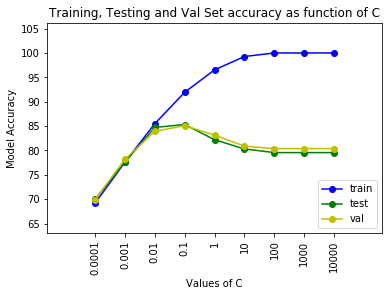

In [10]:
supportVec_plot('Training, Testing and Val Set accuracy as function of C')

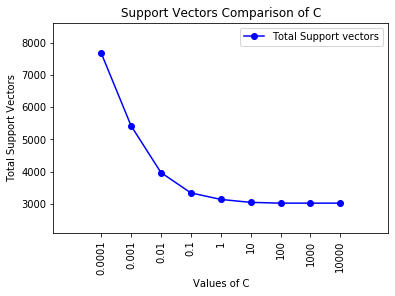

In [11]:
Values_c =[]
num_c_val = []
for k,v in train_input_acc_supp_vec_lin.items():
    Values_c.append(k)
    num_c_val.append(len(v.support_))
    
x = [1,2,3,4,5,6,7,8,9]
labels = Values_c

plt.plot(x, num_c_val, 'ro', color='b', label='Total Support vectors' , linestyle='-')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(loc='upper right')
plt.xlabel('Values of C')
plt.ylabel('Total Support Vectors')
plt.title('Support Vectors Comparison of C')
plt.savefig('Number of support vectors as a function of c.jpg', dpi=300)
plt.show()  

In [12]:
def SupportVec_b_machine(X_train, Y_train, x_tst, y_tst):
    
    model = SVC(kernel='linear', C=10000)
    model.fit(x_train, y_train)
    results = model.predict(test_acc_supp_vec_mac)
    print(confusion_matrix(test_acc_supp_vec_mac, results))

In [13]:
# Combine training and validation set
Comb_train_data_X_ =  np.concatenate((X_train, X_val), axis=0)
Comb_train_data_X_ = np.concatenate((Y_train, Y_val), axis=0)

In [14]:
# svm_b(comb_X_data, comb_Y_data, X_test, Y_test)

In [15]:
def Poly_supp_vec_mac(k_type, i):
    
    model = SVC(kernel=k_type, C=10000, degree=i)
    model.fit(X_train, Y_train)
    
    return model

In [16]:
model_lin_supp_2_vec = Poly_supp_vec_mac(k_type='linear', i=2)
model_poly_supp_2_vec = Poly_supp_vec_mac(k_type='poly', i=2)
model_poly_supp_3_vec = Poly_supp_vec_mac(k_type='poly', i=3)
model_poly_supp_4_vec = Poly_supp_vec_mac(k_type='poly', i=4)

In [17]:
supportVec_test_model = {}
supportVec_train_model = {}
supportVec_val_model = {}

supportVec_train_model['linear_2'] = model_lin_supp_2_vec.score(X_train, Y_train)
supportVec_test_model['linear_2'] = model_lin_supp_2_vec.score(X_test, Y_test)
supportVec_val_model['linear_2'] = model_lin_supp_2_vec.score(X_val, Y_val)

supportVec_train_model['poly_2'] = model_poly_supp_2_vec.score(X_train, Y_train)
supportVec_test_model['poly_2'] = model_poly_supp_2_vec.score(X_test, Y_test)
supportVec_val_model['poly_2'] = model_poly_supp_2_vec.score(X_val, Y_val)

supportVec_train_model['poly_3'] = model_poly_supp_3_vec.score(X_train, Y_train)
supportVec_test_model['poly_3'] = model_poly_supp_3_vec.score(X_test, Y_test)
supportVec_val_model['poly_3'] = model_poly_supp_3_vec.score(X_val, Y_val)

supportVec_train_model['poly_4'] = model_poly_supp_4_vec.score(X_train, Y_train)
supportVec_test_model['poly_4'] = model_poly_supp_4_vec.score(X_test, Y_test)
supportVec_val_model['poly_4'] = model_poly_supp_4_vec.score(X_val, Y_val)

In [18]:
def plot_poly_supp_vec_mac(titl):
    
    x_train_poly_supp, y_train_poly_supp = zip(*sorted(supportVec_train_model.items()))
    x_test_poly_supp, y_test_poly_supp = zip(*sorted(supportVec_test_model.items()))
    x_val_poly_supp, y_val_poly_supp = zip(*sorted(supportVec_val_model.items()))
    
    x = [1, 2, 3, 4]
    poly_train_supp = [y * 100 for y in y_train_poly_supp]
    poly_test_supp = [y * 100 for y in y_test_poly_supp]
    poly_val_supp = [y * 100 for y in y_val_poly_supp]
    
    labels = x_train_poly_supp
    
    plt.plot(x, poly_train_supp, 'ro', color='b', label='train' , linestyle='-')
    plt.plot(x, poly_test_supp, 'ro', color='g', label ='test' , linestyle='-')
    plt.plot(x, poly_val_supp, 'ro', color='y', label = 'dev' , linestyle='-')
    
    plt.xticks(x, labels, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.legend(loc='lower right')
    plt.xlabel('Kernel Settings')
    plt.title(titl)
    plt.ylabel('Accuracy')
    plt.savefig(titl+'.jpg', dpi=300)
    plt.show()  

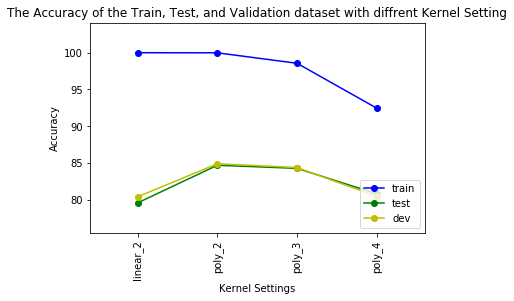

In [19]:
plot_poly_supp_vec_mac('The Accuracy of the Train, Test, and Validation dataset with diffrent Kernel Setting')

In [37]:
def sign(num):
    return +1 if num>0 else -1

def r_y_kernel(row, aph, df_arr):
    
    ind_o = np.where(aph != 0)
    score = 0
    
    for t_i, ind in zip(aph[ind_o], ind_o):
        x_i = df_arr[int(ind[0])]
        score += np.sum(t_i * ((1 + np.dot(row, x_i)) ** 3))
        
    return -1 if score < 0 else 1

In [43]:
def perceptron_kernel_multi(deg, epochs):
    
    kernel_train_acc = []
    kernel_test_acc = []
    kernel_val_acc = []
    alpha = np.zeros(shape=(X_train.shape[0])) 
    cou_ker_mis_epochs = {}
    
    # compute gram matrix
    print('Gram Matrix Computation')
    gm = polynomial_kernel(X_train, degree=deg)
    print('Computation Completed')
    
    for i in range(epochs):
        
        Ba_mistakes_cal = 0
        
        for j in range(X_train.shape[0]):
            
            y_pred = np.sign(np.sum(np.dot(gm[:,j], alpha)))
            
            if y_pred == 0:
                y_pred = -1
            
            if y_pred != Y_train[j]:
                
                Ba_mistakes_cal +=1
                
                alpha[j] += Y_train[j]
                
        cou_ker_mis_epochs[i+1] = Ba_mistakes_cal
        
    for tr in range(len(X_test)):
            kernel_test_acc.append(np.sign(r_y_kernel(X_test[tr], alpha, X_test)))
    
    kernel_per_acc_test = accuracy_score(Y_test, np.array(kernel_test_acc))      
    for tr in range(len(X_train)):
            kernel_train_acc.append(np.sign(r_y_kernel(X_train[tr], alpha, X_train)))
            
    kernel_per_acc_train = accuracy_score(Y_train, np.array(kernel_train_acc))      
    for tr in range(len(X_val)):
            kernel_val_acc.append(np.sign(r_y_kernel(X_val[tr], alpha, X_val)))
            
    kernel_per_acc_val = accuracy_score(Y_val, np.array(kernel_val_acc))
  
    return cou_ker_mis_epochs, kernel_test_acc, kernel_train_acc, kernel_val_acc

In [44]:
kernel_per_err_count, kernel_per_acc_train, kernel_per_acc_test, kernel_per_acc_val = perceptron_kernel_multi(3, 5)

Gram Matrix Computation
Computation Completed


In [45]:
def plot_kp_mistakes(num_mis):
    
    # get results of standard perceptron
    x,  y = zip(*sorted(num_mis.items()))
    
    
    plt.plot(x, y, label='Number of Mistakes', marker='o')
    plt.xticks(np.linspace(1, 5 , 5))
    plt.xlabel('Number Of Epochs')
    plt.ylabel('Number of mistakes')
    plt.legend(loc='upper middle')
    plt.title('Number of mistakes per epoch in kernalized perceptron ')
    plt.savefig('num_mistakes_sp_vs_avp.jpg', dpi=300)
    plt.show()

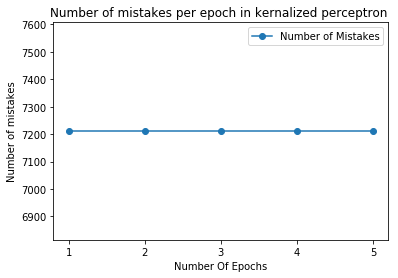

In [30]:
plot_kp_mistakes(kernel_per_err_count)

In [1]:
# print('Kernilized perceptron Accuracy Train %.2f ' %(kernel_per_acc_train*100))
# print('Kernelized perceptron accuracy Test %.2f ' %(kernel_per_acc_test*100))
# print('kernelized Accuracy on Validation data %.2f ' %(kernel_per_acc_val*100))

NameError: name 'kernel_per_acc_train' is not defined